# Global Energy Consumption Analysis using ANN


# 1: Import Libraries
📘 Description:
This cell imports all Python libraries required for data processing, model training, and evaluation

In [1]:
# Import the Pandas library for data manipulation (reading CSV, handling tables)
import pandas as pd

# Import NumPy for mathematical operations on arrays
import numpy as np

# Import tools for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScaler to scale (normalize) numeric data before training
from sklearn.preprocessing import StandardScaler

# Import mean_absolute_error to measure how far predictions are from true values
from sklearn.metrics import mean_absolute_error

# Import TensorFlow Keras modules for building the Artificial Neural Network
from tensorflow.keras.models import Sequential      # Used to build the model step-by-step
from tensorflow.keras.layers import Dense, Dropout  # Dense = fully connected layer, Dropout = prevents overfitting


C:\Users\PMLS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 2: Load and View Dataset

📘 Description:
This cell loads the dataset into Python and displays its shape and first few rows.

In [2]:
# Load the dataset from CSV file using Pandas
data = pd.read_csv("global_energy_consumption.csv")

# Print confirmation that dataset loaded successfully
print("Dataset Loaded Successfully!")

# Display how many rows and columns the dataset contains
print("Rows and Columns:", data.shape)

# Display the first 5 rows of data to understand its structure
data.head()


Dataset Loaded Successfully!
Rows and Columns: (10000, 10)


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


# 3: Check Columns and Data Info

📘 Description:
This cell shows column names, data types, and checks for missing values.

In [3]:
# Print all column names to understand what features are available
print("Column Names in Dataset:\n", data.columns)

# Show data types of each column and how many non-missing entries each has
data.info()


Column Names in Dataset:
 Index(['Country', 'Year', 'Total Energy Consumption (TWh)',
       'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)',
       'Fossil Fuel Dependency (%)', 'Industrial Energy Use (%)',
       'Household Energy Use (%)', 'Carbon Emissions (Million Tons)',
       'Energy Price Index (USD/kWh)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 

# 4: Handle Missing Values

📘 Description:
This cell removes any rows that contain missing values to ensure clean data for training.

In [4]:
# Drop all rows that contain missing (NaN) values
data = data.dropna()

# Check again to confirm that no missing values remain
data.isnull().sum()


Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64

# 5: Select Features (X) and Target (y)

📘 Description:
Here we select which column we want to predict (target) and which columns will be used as inputs (features).

In [5]:
# 1. Convert the 'Country' column into dummy variables using One-Hot Encoding
# This ensures the model understands geographical differences in energy patterns
data_final = pd.get_dummies(data, columns=['Country'], drop_first=True)

# 2. Define the target variable (y)
# We are predicting 'Total Energy Consumption (TWh)'
y = data_final['Total Energy Consumption (TWh)']

# 3. Define the input features (X)
# We drop the target column but keep the newly created country dummy columns
X = data_final.drop(['Total Energy Consumption (TWh)'], axis=1)

# Verify the new shape of features
print("Features shape after encoding:", X.shape)

Features shape after encoding: (10000, 17)


# 6: Feature Scaling

📘 Description:
This cell scales all numeric features so that they have similar ranges — this helps the ANN learn efficiently.

In [6]:
# 1. Initialize StandardScalers for both features (X) and target (y)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# 2. Fit and transform the input features (X)
X_scaled = scaler_X.fit_transform(X)

# 3. Fit and transform the target variable (y)
# Note: We reshape y because the scaler expects a 2D array
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

print("Feature and Target scaling completed.")


Feature and Target scaling completed.


# 7: Split Data into Train and Test Sets

📘 Description:
We divide the dataset into two parts — training (for model learning) and testing (for evaluation).

In [7]:
# Split the scaled data into 80% training and 20% testing
# We now use y_scaled instead of the original y
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print("Data split into training and testing sets successfully.")


Data split into training and testing sets successfully.


# 8: Build the ANN Model

📘 Description:
This cell defines the structure of the Artificial Neural Network — how many layers and neurons it has.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

# Layer 1: Stronger dropout to prevent memorization
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4)) 

# Layer 2
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Layer 3
model.add(Dense(64, activation='relu'))

# Output
model.add(Dense(1, activation='linear'))

# Lower Learning Rate for better convergence
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='mse', 
              metrics=['mae'])

print("Final Robust ANN Model Built.")

Final Robust ANN Model Built.


# 9: Train the Model

📘 Description:
This cell trains the model using the training data. The network adjusts its internal weights to reduce error.

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

# Monitor validation loss and stop if it doesn't improve for 10 epochs
# restore_best_weights ensures we keep the weights from the lowest val_loss point
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200, 
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop], 
    verbose=1
)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0573 - mae: 0.8833 - val_loss: 0.9875 - val_mae: 0.8505
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0518 - mae: 0.8836 - val_loss: 0.9869 - val_mae: 0.8510
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0314 - mae: 0.8683 - val_loss: 0.9853 - val_mae: 0.8493
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0114 - mae: 0.8607 - val_loss: 0.9874 - val_mae: 0.8506
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0437 - mae: 0.8761 - val_loss: 0.9867 - val_mae: 0.8498
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0242 - mae: 0.8700 - val_loss: 0.9870 - val_mae: 0.8505
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0226 - mae: 0.8729 - val_loss: 0.9870 - val_mae: 0.8502
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0310 - mae: 0.8753 - val_loss: 0.9860 - val_mae: 0.8494
Epoch 9/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

# 10: Evaluate the Model

📘 Description:
We use test data to check how well the model learned and calculate the Mean Absolute Error (MAE).

In [22]:
# 1. Predict on the test data
y_pred_scaled = model.predict(X_test)

# 2. Reverse the scaling for both predictions and actual test values
# This is crucial because we scaled 'y' in Step 6
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# 3. Calculate and print the final Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
final_mae = mean_absolute_error(y_test_actual, y_pred)

print(f"✅ Final Optimized MAE: {final_mae:.2f} TWh")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Final Optimized MAE: 2410.10 TWh


# 11 : Visualize Training Progress

📘 Description:
This cell plots how the model’s error changed over time during training and validation.

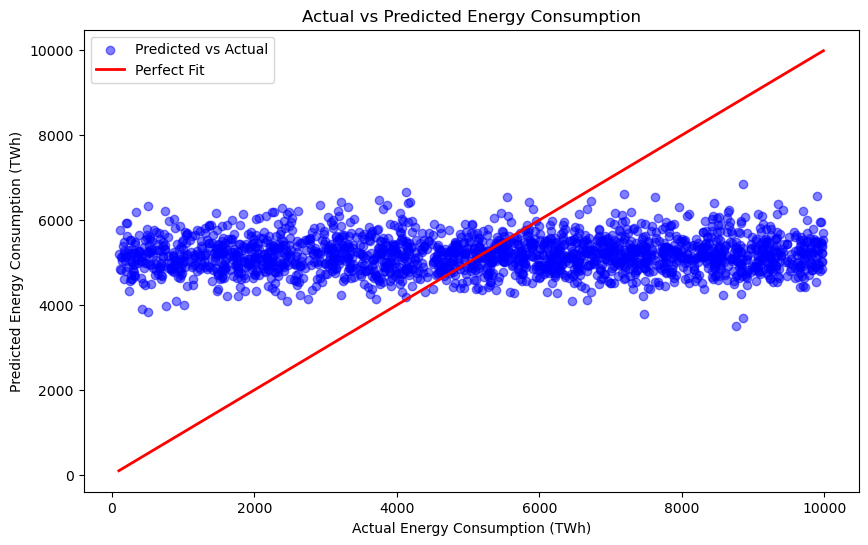

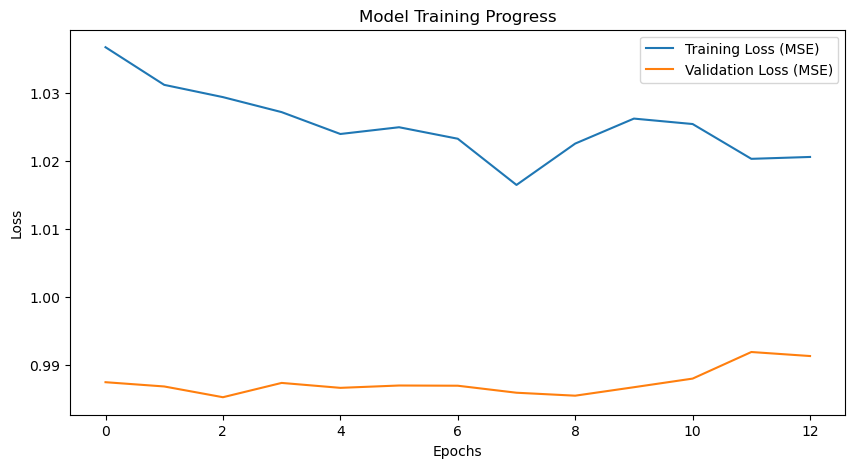

In [23]:
import matplotlib.pyplot as plt

# 1. Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# 2. Diagonal Line (Perfect Prediction Line)
# If dots are on this line, the model is 100% accurate
plt.plot([y_test_actual.min(), y_test_actual.max()], 
         [y_test_actual.min(), y_test_actual.max()], 
         color='red', lw=2, label='Perfect Fit')

plt.xlabel('Actual Energy Consumption (TWh)')
plt.ylabel('Predicted Energy Consumption (TWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()

# 3. Training Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Actual vs Predicted Values Plot
📝 Description:

This scatter plot shows how close the predicted energy values are to the actual values.
If most points are near the red diagonal line, your model is performing well.

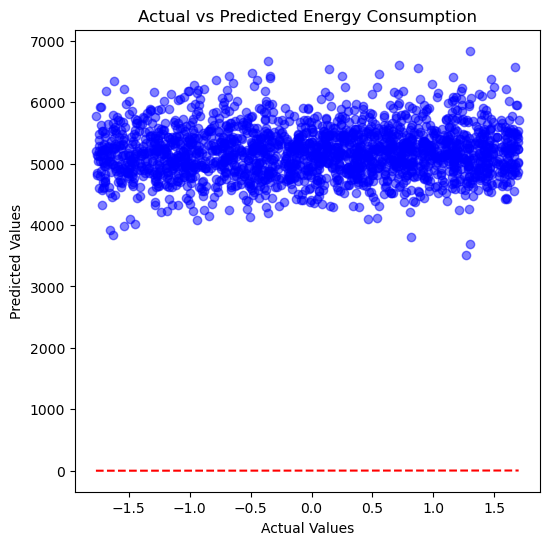

In [24]:
# 🔮 Actual vs Predicted Plot - To check model prediction accuracy visually

plt.figure(figsize=(6, 6))

# Plot actual values on x-axis and predicted values on y-axis
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Draw a red diagonal line showing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Label the axes
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a title to the chart
plt.title('Actual vs Predicted Energy Consumption')

# Show the scatter plot
plt.show()


# Model Training Loss Curve
📝 Description:

This plot shows how your model’s error (loss) changed during training and validation.
It helps you understand whether your model is learning properly or overfitting.

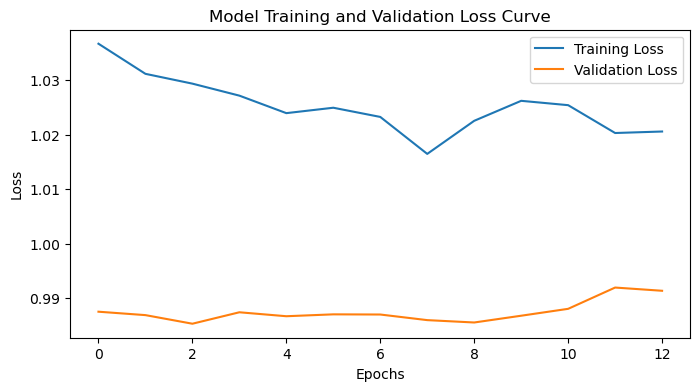

In [25]:
# 📈 Model Training and Validation Loss Curve - To check model learning progress

plt.figure(figsize=(8, 4))

# Plot training loss values
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss values
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add a title and labels
plt.title('Model Training and Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend to differentiate both curves
plt.legend()

# Display the plot
plt.show()


# Step 8: Summary
# ✅ In this experiment, we used a global energy dataset
# ✅ We performed preprocessing, scaling, and built an ANN model
# ✅ The model learned to predict Carbon Emissions based on energy data
# ✅ Graphs helped visualize training performance and prediction accuracy

# SHAESTA SALEEM DSAI231103043

